# ENPM 667: Control of Robotic Systems
## Final Project

> Authors:
> - Munyaradzi Antony (UID: 120482731)
> - Varad Nerlekar (UID: 120501135)

## Install dependencies

In [ ]:
!pip install control

## Part C: Controllability Check for the system

In [ ]:
# Importing libraries
import sympy as sp
from sympy import simplify, symbols
from pprint import pprint


# Defining the masses, link lengths and gravity as symbols
M, m1, m2, l1, l2, g = sp.symbols('M m1 m2 l1 l2 g')

In [ ]:
# Defining the linearized state-space equation
A = sp.Matrix([
  [0, 1, 0, 0, 0, 0],
  [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
  [0, 0, 0, 1, 0, 0],
  [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
  [0, 0, 0, 0, 0, 1],
  [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

# Printing the A Matrix
A

Matrix([
[0, 1,                  0, 0,                  0, 0],
[0, 0,            -g*m1/M, 0,            -g*m2/M, 0],
[0, 0,                  0, 1,                  0, 0],
[0, 0, -g*(M + m1)/(M*l1), 0,       -g*m2/(M*l1), 0],
[0, 0,                  0, 0,                  0, 1],
[0, 0,       -g*m1/(M*l2), 0, -g*(M + m2)/(M*l2), 0]])

In [ ]:
B = sp.Matrix([
  0,
  1 / M,
  0,
  1 / (M * l1),
  0,
  1 / (M * l2)
]).reshape(6, 1)

# Printing the B Matrix
B

Matrix([
[       0],
[     1/M],
[       0],
[1/(M*l1)],
[       0],
[1/(M*l2)]])

In [ ]:
# Controllability Matrix
C = sp.Matrix.hstack(
    B, A * B, A**2 * B, A**3 * B, A**4 * B, A**5 * B
)
C

Matrix([
[       0,      1/M,                                               0,                -g*m2/(M**2*l2) - g*m1/(M**2*l1),                                                                                                                                                                  0,                                    (M*g**2*l1*m2 + g**2*l1*m2**2 + g**2*l2*m1*m2)/(M**3*l1*l2**2) + (M*g**2*l2*m1 + g**2*l1*m1*m2 + g**2*l2*m1**2)/(M**3*l1**2*l2)],
[     1/M,        0,                -g*m2/(M**2*l2) - g*m1/(M**2*l1),                                               0,                                    (M*g**2*l1*m2 + g**2*l1*m2**2 + g**2*l2*m1*m2)/(M**3*l1*l2**2) + (M*g**2*l2*m1 + g**2*l1*m1*m2 + g**2*l2*m1**2)/(M**3*l1**2*l2),                                                                                                                                                                  0],
[       0, 1/(M*l1),                                               0, -g*m2/(M**2*l1*l2) + (-M*

In [ ]:
# Taking the determinant of the Controllability Matrix
det_C = C.det()
det_C

-(g**6*l1**2 - 2*g**6*l1*l2 + g**6*l2**2)/(M**6*l1**6*l2**6)

In [ ]:
# Taking the rank of the Controllability Matrix
rank_C = C.rank()
rank_C

6

In [ ]:
# Special case: When pendulum lengths are equal i.e l1 = l2
C_special = C.subs(l1, l2)
C_special

Matrix([
[       0,      1/M,                                               0,                -g*m1/(M**2*l2) - g*m2/(M**2*l2),                                                                                                                                            0,                    (M*g**2*l2*m1 + g**2*l2*m1**2 + g**2*l2*m1*m2)/(M**3*l2**3) + (M*g**2*l2*m2 + g**2*l2*m1*m2 + g**2*l2*m2**2)/(M**3*l2**3)],
[     1/M,        0,                -g*m1/(M**2*l2) - g*m2/(M**2*l2),                                               0,                    (M*g**2*l2*m1 + g**2*l2*m1**2 + g**2*l2*m1*m2)/(M**3*l2**3) + (M*g**2*l2*m2 + g**2*l2*m1*m2 + g**2*l2*m2**2)/(M**3*l2**3),                                                                                                                                            0],
[       0, 1/(M*l2),                                               0, -g*m2/(M**2*l2**2) + (-M*g - g*m1)/(M**2*l2**2),                                                                 

In [ ]:
# Taking the rank of the Controllability Matrix for the Special case
rank_C_special = C_special.rank()
rank_C_special

4

In [ ]:
# The Controllability Condition for the system
if det_C == 0:
  print("The system is not controllable as it is not full rank.")
else:
  # print("The system may be controllable if is controllable for all conditions.")
  if rank_C == rank_C_special:
      print("The system is controllable as the ranks are equal for all conditions.")
  else:
      print("The system is not controllable as the ranks are not equal for all conditions.")

The system is not controllable as the ranks are not equal for all conditions.


## Part D-a: LQR Controller for Linear System

In [ ]:
# Importing Libraries
import scipy
import numpy as np
import matplotlib.pyplot as plt

# Defining the system parameters
M = 1000  # (Kg): Mass of the cart
m1 = 100  # (Kg): Mass of Pendulum 1
m2 = 100  # (Kg): Mass of Pendulum 2
l1 = 20   # (m): Length of link 1
l2 = 10   # (m): Length of Link 2
g = 9.81  # (m/s^2): Acceleration due to gravity

In [ ]:
# Defining the linearized state-space equation
A = np.array([
  [0, 1, 0, 0, 0, 0],
  [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
  [0, 0, 0, 1, 0, 0],
  [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
  [0, 0, 0, 0, 0, 1],
  [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

# Printing the A Matrix
simplify(A)

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -0.981, 0.0, -0.981, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, -0.53955, 0.0, -0.04905, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, -0.0981, 0.0, -1.0791, 0.0]]

In [ ]:
B = np.array([
  0,
  1 / M,
  0,
  1 / (M * l1),
  0,
  1 / (M * l2)
]).reshape(6, 1)

# Printing the B Matrix
simplify(B)

[[0.0], [0.001], [0.0], [5.0e-5], [0.0], [0.0001]]

In [ ]:
# Controllability Matrix
C = np.column_stack([
    B, A @ B, A@A @ B, A@A@A @ B, A@A@A@A @ B, A@A@A@A@A @ B
])

In [ ]:
# Taking the rank of the Controllability Matrix to check its controllability
rank_C = np.linalg.matrix_rank(C)
if rank_C == C.shape[0]:
  print("The system is controllable.")
else:
  print("The system is not controllable.")

The system is controllable.


In [ ]:
# Setting the initial conditions
x_initial = np.array([0, 0, 10, 0, 20, 0])
Q = np.diag([100, 100, 100, 100, 100, 100])
R = np.array([[0.001]])

In [ ]:
# Implementing the LQR Controller (scipy.linalg.solve_continuous_are) using the Ricatti Equation
P = scipy.linalg.solve_continuous_are(A, B, Q, R)
simplify(P)

[[293.104392177231, 379.55092356792, -216.133955681951, -605.569584766415, -105.703878321283, -330.446783127645], [379.55092356792, 1145.28754618159, -27.928532323754, -2215.59112338585, 20.6240730662794, -1076.30518533009], [-216.133955681951, -27.928532323754, 13614.739651211, 183.569433993754, 72.689320596692, -229.526566948364], [-605.569584766415, -2215.59112338585, 183.569433993754, 29065.7011334585, 457.988540473508, 788.304870562619], [-105.703878321283, 20.6240730662794, 72.689320596692, 457.988540473508, 6550.09209215496, 5.86654946079844], [-330.446783127645, -1076.30518533009, -229.526566948364, 788.304870562619, 5.86654946079844, 7026.24928793402]]

In [ ]:
# Computing the Feedback Gain Matrix
K = np.dot(np.linalg.inv(R), np.dot(B.T, P))
simplify(K)

[[316.227766016835, 926.877471479285, -41.7027173189027, -683.475579656664, 44.1101550360346, -334.265013008559]]

In [ ]:
# Setting the output Matrices C & D
C = np.eye(6)
D = np.zeros((6, 1))

# Setting Input Signal U
t = np.linspace(0, 200, 1000)
u = np.zeros_like(t)

In [ ]:
# System Response without the controller
system_without_controller = scipy.signal.StateSpace(A, B, C, D)
_, y_without_controller, x_without_controller = scipy.signal.lsim(system_without_controller, u, t, x_initial)

In [ ]:
# System with LQR Controller
A_closed_loop = A - np.dot(B, K)
simplify(A_closed_loop)

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [-0.316227766016835, -0.926877471479285, -0.939297282681097, 0.683475579656664, -1.02511015503603, 0.334265013008559], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [-0.0158113883008418, -0.0463438735739642, -0.537464864134055, 0.0341737789828332, -0.0512555077518017, 0.0167132506504279], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [-0.0316227766016835, -0.0926877471479285, -0.0939297282681097, 0.0683475579656664, -1.0835110155036, 0.0334265013008559]]

In [ ]:
# Getting the Eigenvalues of the Closed Loop System
eigenvalues_closed_loop = np.linalg.eigvals(A_closed_loop)
simplify(eigenvalues_closed_loop)

[-0.383784665947216 + 0.354266878997317*I, -0.383784665947216 - 0.354266878997317*I, -0.0297862291376132 + 1.03473463598333*I, -0.0297862291376132 - 1.03473463598333*I, -0.0160677005129693 + 0.721304562445142*I, -0.0160677005129693 - 0.721304562445142*I]

In [ ]:
# System Response with the controller
system_with_controller = scipy.signal.StateSpace(A_closed_loop, B, C, D)
_, y_with_controller, x_with_controller = scipy.signal.lsim(system_with_controller, u, t, x_initial)

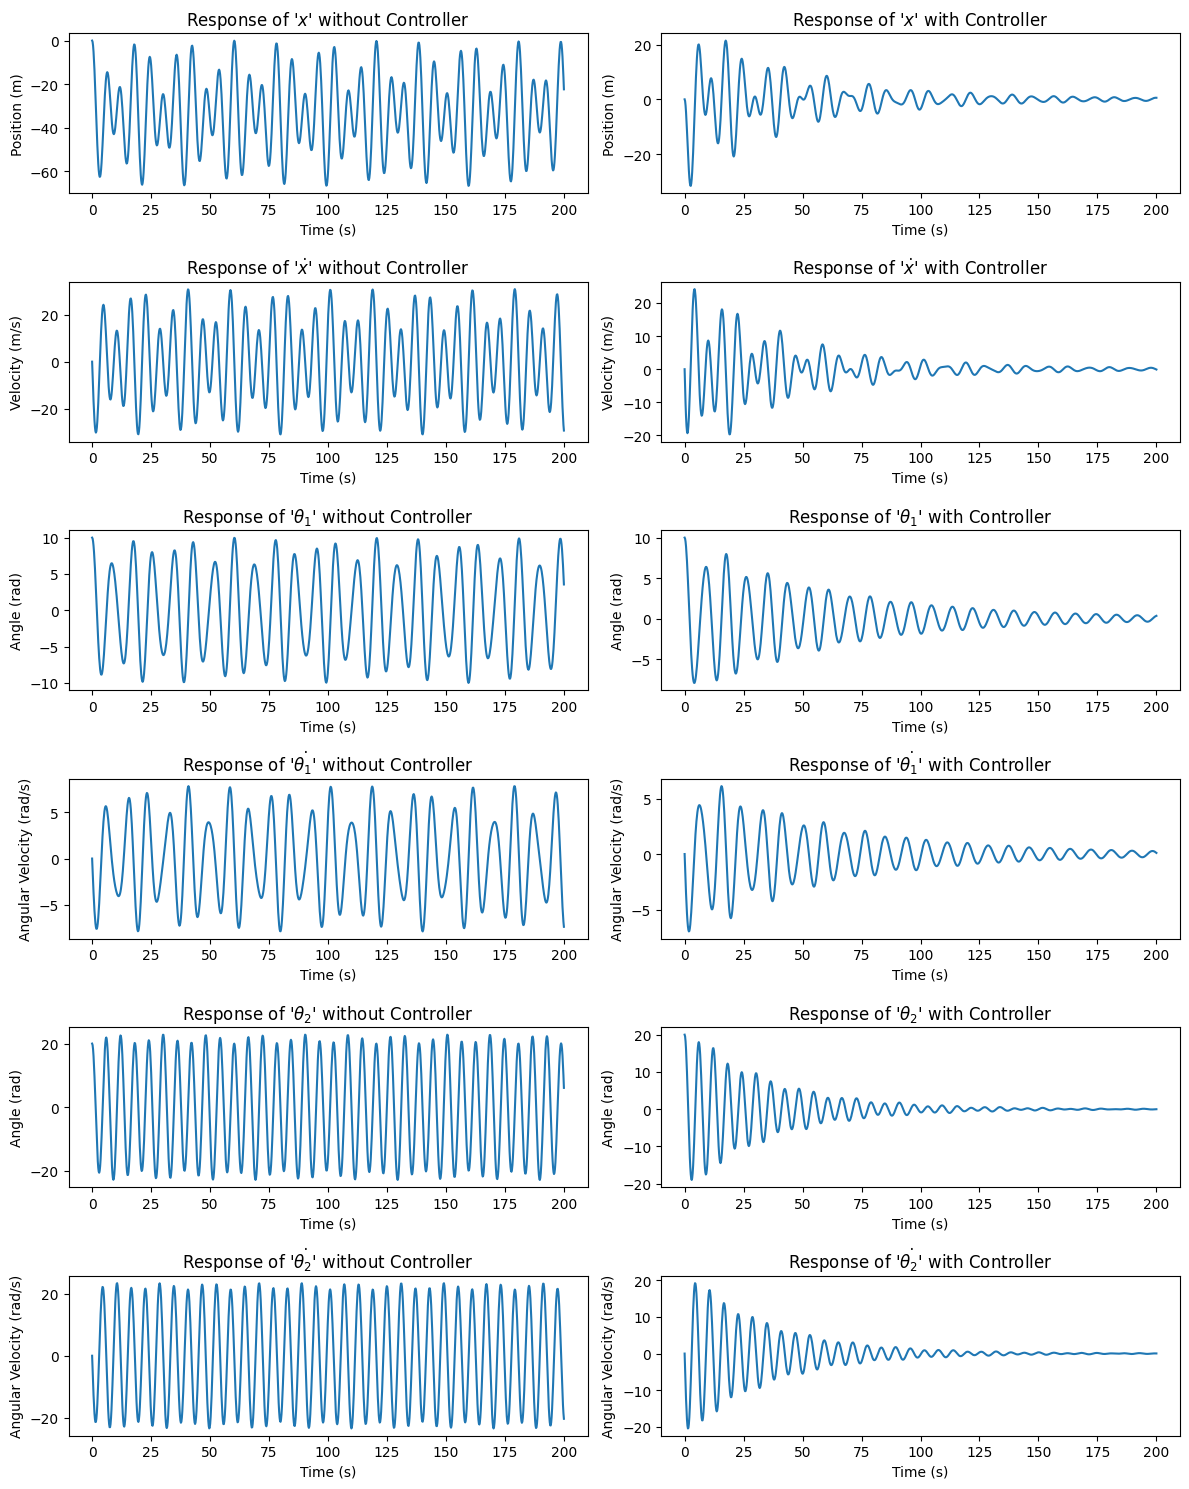

In [ ]:
# Plotting the responses
fig, ax = plt.subplots(6, 2, figsize=(12, 15))

# Plot position x without controller
ax[0, 0].plot(t, x_without_controller[:, 0])
ax[0, 0].set_title(r"Response of '$x$' without Controller")
ax[0, 0].set_xlabel('Time (s)')
ax[0, 0].set_ylabel('Position (m)')

# Plot position x with controller
ax[0, 1].plot(t, x_with_controller[:, 0])
ax[0, 1].set_title(r"Response of '$x$' with Controller")
ax[0, 1].set_xlabel('Time (s)')
ax[0, 1].set_ylabel('Position (m)')

# Plot velocity dx/dt without controller
ax[1, 0].plot(t, x_without_controller[:, 1])
ax[1, 0].set_title(r"Response of '$\dot{x}$' without Controller")
ax[1, 0].set_xlabel('Time (s)')
ax[1, 0].set_ylabel('Velocity (m/s)')

# Plot velocity dx/dt with controller
ax[1, 1].plot(t, x_with_controller[:, 1])
ax[1, 1].set_title(r"Response of '$\dot{x}$' with Controller")
ax[1, 1].set_xlabel('Time (s)')
ax[1, 1].set_ylabel('Velocity (m/s)')

# Plot the first pendulum angle (without and with controller)
ax[2, 0].plot(t, x_without_controller[:, 2])
ax[2, 0].set_title(r"Response of '$\theta_1$' without Controller")
ax[2, 0].set_xlabel('Time (s)')
ax[2, 0].set_ylabel('Angle (rad)')

ax[2, 1].plot(t, x_with_controller[:, 2])
ax[2, 1].set_title(r"Response of '$\theta_1$' with Controller")
ax[2, 1].set_xlabel('Time (s)')
ax[2, 1].set_ylabel('Angle (rad)')

# Plot the first pendulum angular velocity (without and with controller)
ax[3, 0].plot(t, x_without_controller[:, 3])
ax[3, 0].set_title(r"Response of '$\dot{\theta_1}$' without Controller")
ax[3, 0].set_xlabel('Time (s)')
ax[3, 0].set_ylabel('Angular Velocity (rad/s)')

ax[3, 1].plot(t, x_with_controller[:, 3])
ax[3, 1].set_title(r"Response of '$\dot{\theta_1}$' with Controller")
ax[3, 1].set_xlabel('Time (s)')
ax[3, 1].set_ylabel('Angular Velocity (rad/s)')

# Plot the second pendulum angle (without and with controller)
ax[4, 0].plot(t, x_without_controller[:, 4])
ax[4, 0].set_title(r"Response of '$\theta_2$' without Controller")
ax[4, 0].set_xlabel('Time (s)')
ax[4, 0].set_ylabel('Angle (rad)')

ax[4, 1].plot(t, x_with_controller[:, 4])
ax[4, 1].set_title(r"Response of '$\theta_2$' with Controller")
ax[4, 1].set_xlabel('Time (s)')
ax[4, 1].set_ylabel('Angle (rad)')

# Plot the second pendulum angular velocity (without and with controller)
ax[5, 0].plot(t, x_without_controller[:, 5])
ax[5, 0].set_title(r"Response of '$\dot{\theta_2}$' without Controller")
ax[5, 0].set_xlabel('Time (s)')
ax[5, 0].set_ylabel('Angular Velocity (rad/s)')

ax[5, 1].plot(t, x_with_controller[:, 5])
ax[5, 1].set_title(r"Response of '$\dot{\theta_2}$' with Controller")
ax[5, 1].set_xlabel('Time (s)')
ax[5, 1].set_ylabel('Angular Velocity (rad/s)')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save each plot as a PNG image
fig.savefig('response_plots - Linear system.png', dpi=300)

# Show the plot
plt.show()


## Part D-b: LQR Controller for Non-Linear System

In [ ]:
# Importing Libraries
import scipy
import numpy as np
import matplotlib.pyplot as plt

# Defining the system parameters
M = 1000  # (Kg): Mass of the cart
m1 = 100  # (Kg): Mass of Pendulum 1
m2 = 100  # (Kg): Mass of Pendulum 2
l1 = 20   # (m): Length of link 1
l2 = 10   # (m): Length of Link 2
g = 9.81  # (m/s^2): Acceleration due to gravity

In [ ]:
# Define the nonlinear system (state = [x, dx, theta1, dtheta1, theta2, dtheta2])
def nonlinear_system(t, y):
    # Control input (LQR feedback law)
    F = -np.dot(K_val, y)

    # Initialize the dydt vector (6 state variables)
    dydt = np.zeros(6)

    # Cart position and velocity dynamics (x, dx)
    dydt[0] = y[1]  # dx/dt = velocity of the cart
    dydt[1] = (F - (g/2) * (m1*np.sin(2*y[2]) + m2*np.sin(2*y[4])) - (m1*l1*y[3]**2)) / (M + m1)

    # Pendulum 1 angle and angular velocity dynamics (theta1, dtheta1)
    dydt[2] = y[3]  # dtheta1/dt = angular velocity of the first pendulum
    dydt[3] = (dydt[1] * np.cos(y[2]) - g * np.sin(y[2])) / l1  # d^2theta1/dt^2

    # Pendulum 2 angle and angular velocity dynamics (theta2, dtheta2)
    dydt[4] = y[5]  # dtheta2/dt = angular velocity of the second pendulum
    dydt[5] = (dydt[1] * np.cos(y[4]) - g * np.sin(y[4])) / l2  # d^2theta2/dt^2

    return dydt

In [ ]:
# Setting the initial conditions
y_initial = np.array([0, 0, 10, 0, 20, 0])
t = np.linspace(0, 10000, 1000)
u = 0

# Control Gain Matrix (K_val)
K_val = np.array([10, 10, 10, 10, 10, 10])

In [ ]:
# Solve the system using ODE solver
solution = scipy.integrate.solve_ivp(nonlinear_system, (0, 10000), y_initial, t_eval=t).y

# Extract the state variables
x = solution[0]
dx = solution[1]
theta1 = solution[2]
dtheta1 = solution[3]
theta2 = solution[4]
dtheta2 = solution[5]

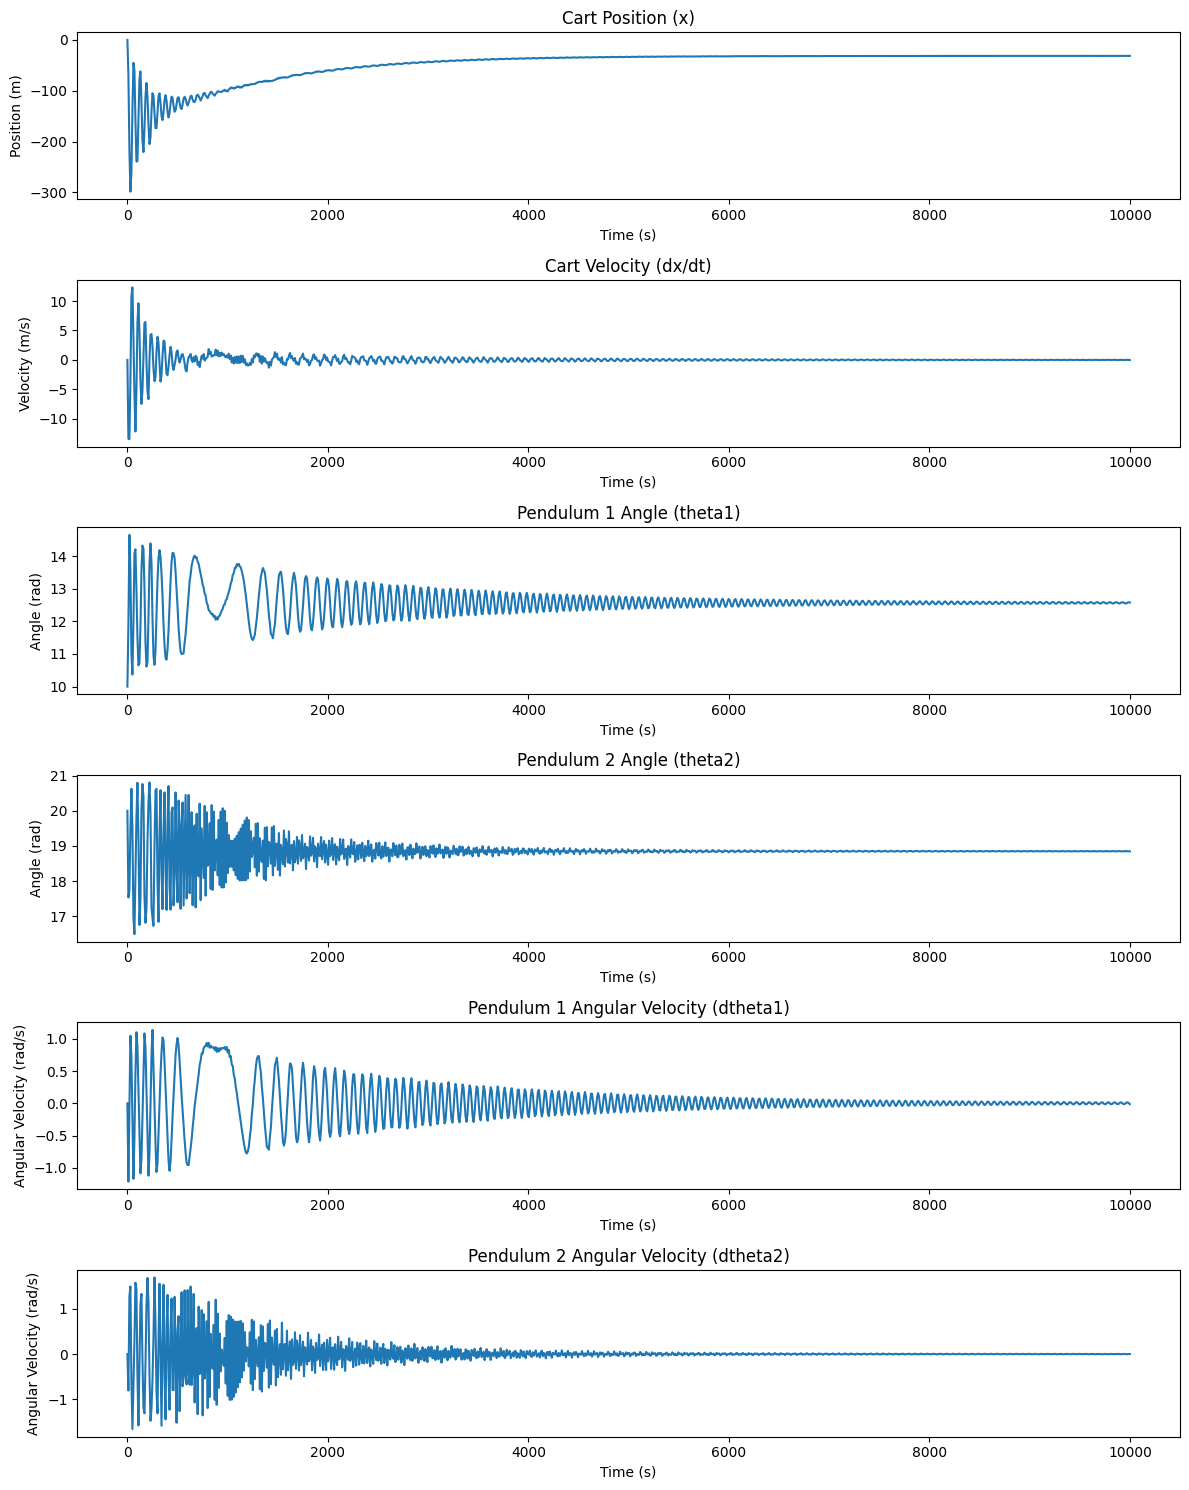

In [ ]:
# Plotting the responses
fig, ax = plt.subplots(6, 1, figsize=(12, 15))

# Plot position x
plt.subplot(6, 1, 1)
plt.plot(t, x)
plt.title('Cart Position (x)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot velocity dx/dt
plt.subplot(6, 1, 2)
plt.plot(t, dx)
plt.title('Cart Velocity (dx/dt)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

# Plot pendulum 1 angle (theta1)
plt.subplot(6, 1, 3)
plt.plot(t, theta1)
plt.title('Pendulum 1 Angle (theta1)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')

# Plot pendulum 2 angle (theta2)
plt.subplot(6, 1, 4)
plt.plot(t, theta2)
plt.title('Pendulum 2 Angle (theta2)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')

# Plot pendulum 1 angular velocity (dtheta1)
plt.subplot(6, 1, 5)
plt.plot(t, dtheta1)
plt.title('Pendulum 1 Angular Velocity (dtheta1)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')

# Plot pendulum 2 angular velocity (dtheta2)
plt.subplot(6, 1, 6)
plt.plot(t, dtheta2)
plt.title('Pendulum 2 Angular Velocity (dtheta2)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save each plot as a PNG image
fig.savefig('response_plots - Nonlinear system.png', dpi=300)

# Show the plot
plt.show()


# Part E: Observability Check

In [ ]:
# Importing Libraries
import numpy as np

# Defining the system parameters
M = 1000  # (Kg): Mass of the cart
m1 = 100  # (Kg): Mass of Pendulum 1
m2 = 100  # (Kg): Mass of Pendulum 2
l1 = 20   # (m): Length of link 1
l2 = 10   # (m): Length of Link 2
g = 9.81  # (m/s^2): Acceleration due to gravity

In [ ]:
# Observability matrix for a set of C matrices
def observability_matrix(A, C):
  obs_matrix = C
  for i in range(1, A.shape[0]):
    obs_matrix = np.vstack((obs_matrix, C @ np.linalg.matrix_power(A, i)))
  return obs_matrix

In [ ]:
# Defining the linearized state-space equation
A = np.array([
  [0, 1, 0, 0, 0, 0],
  [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
  [0, 0, 0, 1, 0, 0],
  [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
  [0, 0, 0, 0, 0, 1],
  [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

# Printing the A Matrix
simplify(A)

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -0.981, 0.0, -0.981, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, -0.53955, 0.0, -0.04905, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, -0.0981, 0.0, -1.0791, 0.0]]

In [ ]:
B = np.array([
  0,
  1 / M,
  0,
  1 / (M * l1),
  0,
  1 / (M * l2)
]).reshape(6, 1)

# Printing the B Matrix
simplify(B)

[[0.0], [0.001], [0.0], [5.0e-5], [0.0], [0.0001]]

In [ ]:
# Defining the C Matrices
C_x = np.array([[1, 0, 0, 0, 0, 0]])
C_theta1 = np.array([[0, 0, 1, 0, 0, 0]])
C_theta2 = np.array([[0, 0, 0, 0, 1, 0]])

In [ ]:
# Check observability for x
C_matrix = C_x
observability = observability_matrix(A, C_matrix)
rank = np.linalg.matrix_rank(observability)
observable = "Yes" if rank == A.shape[0] else "No"
print("For state x:")
print("Rank for x:", rank)
print("Observable for x:", observable)

# Check observability for θ_1 and θ_2
C_matrix = np.vstack([C_theta1, C_theta2])
observability = observability_matrix(A, C_matrix)
rank = np.linalg.matrix_rank(observability)
observable = "Yes" if rank == A.shape[0] else "No"
print("\nFor θ_1 & θ_2:")
print("Rank for θ_1 & θ_2:", rank)
print("Observable for θ_1 & θ_2:", observable)

# Check observability for x and θ_2
C_matrix = np.vstack([C_x, C_theta2])
observability = observability_matrix(A, C_matrix)
rank = np.linalg.matrix_rank(observability)
observable = "Yes" if rank == A.shape[0] else "No"
print("\nFor x & θ_2:")
print("Rank for x & θ_2:", rank)
print("Observable for x & θ_2:", observable)

# Check observability for x, θ_1 and θ_2
C_matrix = np.vstack([C_x, C_theta1, C_theta2])
observability = observability_matrix(A, C_matrix)
rank = np.linalg.matrix_rank(observability)
observable = "Yes" if rank == A.shape[0] else "No"
print("\nFor x, θ_1 & θ_2:")
print("Rank for x, θ_1 & θ_2:", rank)
print("Observable for x, θ_1 & θ_2:", observable)


For state x:
Rank for x: 6
Observable for x: Yes

For θ_1 & θ_2:
Rank for θ_1 & θ_2: 4
Observable for θ_1 & θ_2: No

For x & θ_2:
Rank for x & θ_2: 6
Observable for x & θ_2: Yes

For x, θ_1 & θ_2:
Rank for x, θ_1 & θ_2: 6
Observable for x, θ_1 & θ_2: Yes


# Part F-a: Luenberger Observer for Linear System

In [ ]:
# Importing Libraries
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Defining the system parameters
M = 1000  # (Kg): Mass of the cart
m1 = 100  # (Kg): Mass of Pendulum 1
m2 = 100  # (Kg): Mass of Pendulum 2
l1 = 20   # (m): Length of link 1
l2 = 10   # (m): Length of Link 2
g = 9.81  # (m/s^2): Acceleration due to gravity

In [ ]:
# Defining state space matrices
A = np.array([
  [0, 1, 0, 0, 0, 0],
  [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
  [0, 0, 0, 1, 0, 0],
  [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
  [0, 0, 0, 0, 0, 1],
  [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

B = np.array([
    0,
    1 / M,
    0,
    1 / (M * l1),
    0,
    1 / (M * l2)
]).reshape(6, 1)

D = np.zeros((1, 1))

In [ ]:
# Setting LQR parameters
Q = np.diag([1000, 1000, 1000, 1000, 1000, 1000])
R = np.array([[0.01]])
K, S, eigen_values = ctrl.lqr(A, B, Q, R)

In [ ]:
# Setting initial conditions for the observer
# [x1, x1_dot, x2, x2_dot, theta1, theta1_dot, x_observer, x_dot_observer, observer_angle_error, observer_angular_velocity_error, error_x2, error_x2_dot]
initial_conditions = [10, 10, 30, 10, 50, 45, 10, 0, 0, 0, 0, 0]

In [ ]:
# Define observer output matrices and corresponding L matrices
C_matrices = [np.array([[1, 0, 0, 0, 0, 0]]),   # Observing x component
              np.array([[1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0]]),   # Observing x and theta2
              np.array([[1, 0, 0, 0, 0, 0],     # Observing x, theta1 and theta2
                        [1, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0]])]

poles = -np.linspace(1, 6, 6)
L_matrices = [ctrl.place(A.T, C.T, poles).T for C in C_matrices]

In [ ]:
# Construct and analyze each system
def create_augmented_system(A, B, K, L, C):
  """Create the augmented system (observer design)."""
  A_q = np.block([[A - B @ K, B @ K], [np.zeros(A.shape), A - L @ C]])
  B_q = np.block([[B], [np.zeros(B.shape)]])
  C_q = np.block([C, np.zeros(C.shape)])
  D_q = np.zeros((C.shape[0], B.shape[1]))
  sys = ctrl.ss(A_q, B_q, C_q, D_q)
  return sys

In [ ]:
def plot_initial_response(sys, initial_conditions, plot_index):
  """Plot the initial response for a system."""
  T, yout = ctrl.initial_response(sys, T=np.linspace(0, 200, 100), X0=initial_conditions)
  yout = np.squeeze(yout)  # Ensure yout is a 1D array if it has only one output

  plt.subplot(len(C_matrices), 2, plot_index)
  if yout.ndim == 1:
      plt.plot(T, yout)  # Default color
  else:
      for j in range(yout.shape[0]):
          plt.plot(T, yout[j, :], label=f'Output {j+1}')
      plt.legend()
  plt.title(f'Initial Response')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.grid(True)

In [ ]:
def plot_step_response(sys, plot_index):
  """Plot the step response for a system."""
  T, yout = ctrl.step_response(sys, T=np.linspace(0, 200, 100))
  yout = np.squeeze(yout)  # Ensure yout is a 1D array if it has only one output

  plt.subplot(len(C_matrices), 2, plot_index)
  if yout.ndim == 1:
      plt.plot(T, yout)  # Default color
  else:
      for j in range(yout.shape[0]):
          plt.plot(T, yout[j, :], label=f'Output {j+1}')
      plt.legend()
  plt.title(f'Step Response')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.grid(True)

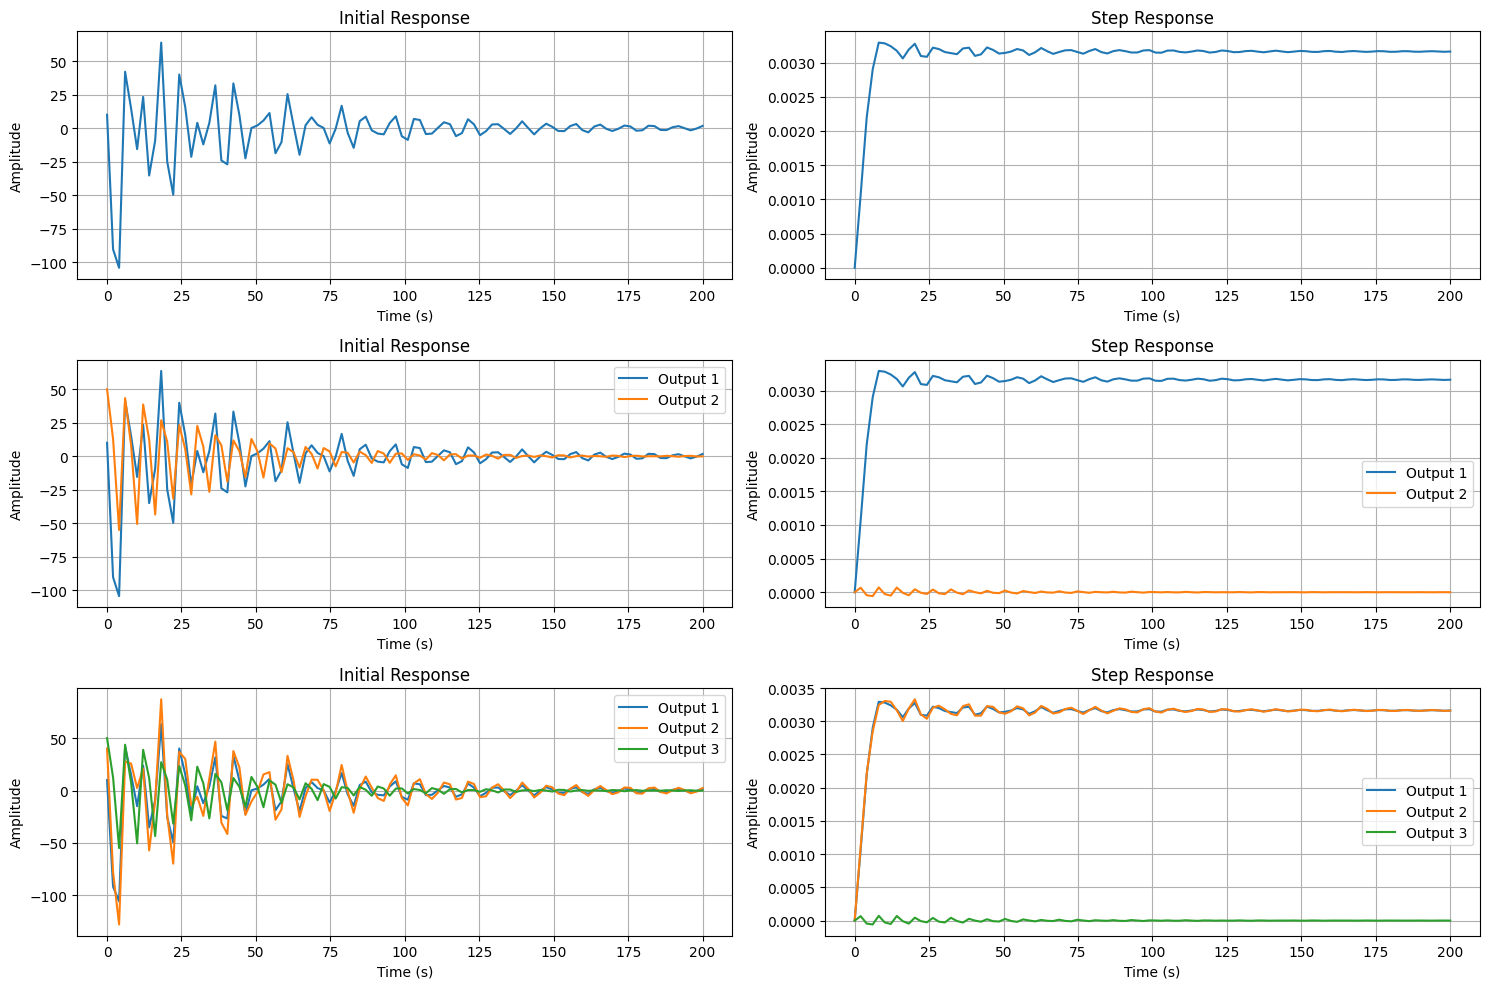

In [ ]:
def plot_responses(A, B, K, L_matrices, C_matrices, initial_conditions):
  """Generate and plot the responses of the system."""
  plt.figure(figsize=(15, 10))

  for i, (C, L) in enumerate(zip(C_matrices, L_matrices)):
    sys = create_augmented_system(A, B, K, L, C)

    # Plot initial response of the system
    plot_initial_response(sys, initial_conditions, 2*i + 1)

    # Plot step response of the system
    plot_step_response(sys, 2*i + 2)

  plt.tight_layout()
  plt.show()

# Example usage
plot_responses(A, B, K, L_matrices, C_matrices, initial_conditions)

# Part F-b: Luenberger Observer for Non-Linear System

In [ ]:
# Importing Libraries
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Defining the system parameters
M = 1000  # (Kg): Mass of the cart
m1 = 100  # (Kg): Mass of Pendulum 1
m2 = 100  # (Kg): Mass of Pendulum 2
l1 = 20   # (m): Length of link 1
l2 = 10   # (m): Length of Link 2
g = 9.81  # (m/s^2): Acceleration due to gravity

In [ ]:
# Defining state space matrices
A = np.array([
  [0, 1, 0, 0, 0, 0],
  [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
  [0, 0, 0, 1, 0, 0],
  [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
  [0, 0, 0, 0, 0, 1],
  [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

B = np.array([
    0,
    1 / M,
    0,
    1 / (M * l1),
    0,
    1 / (M * l2)
]).reshape(6, 1)

D = np.zeros((1, 1))

In [ ]:
# Setting LQR parameters
Q = np.diag([1000, 1000, 1000, 1000, 1000, 1000])
R = np.array([[0.01]])
K, S, eigen_values = ctrl.lqr(A, B, Q, R)

In [ ]:
# Setting initial conditions for the observer
# [x1, x1_dot, x2, x2_dot, theta1, theta1_dot, x_observer, x_dot_observer, observer_angle_error, observer_angular_velocity_error, error_x2, error_x2_dot]
initial_conditions = [10, 10, 30, 10, 50, 45, 10, 0, 0, 0, 0, 0]

In [ ]:
# Define observer output matrices and corresponding L matrices
C_matrices = [np.array([[1, 0, 0, 0, 0, 0]]),   # Observing x component
              np.array([[1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0]]),   # Observing x and theta2
              np.array([[1, 0, 0, 0, 0, 0],     # Observing x, theta1 and theta2
                        [1, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0]])]

poles = -np.linspace(1, 6, 6)
L_matrices = [ctrl.place(A.T, C.T, poles).T for C in C_matrices]

In [ ]:
# Function to create the system for each observer configuration
def create_system(A, B, C, poles, K, L):
    """
    Create the system with the given observer configuration.

    Parameters:
    - A, B, C: System matrices
    - poles: Desired poles for the controller
    - K: State feedback gains
    - L: Observer gains

    Returns:
    - sys: The state-space system object
    """
    # Construct the augmented system with state feedback and observer
    A_q = np.block([[A - B @ K, B @ K], [np.zeros_like(A), A - L @ C]])
    B_q = np.block([[B], [np.zeros(B.shape)]])
    C_q = np.block([C, np.zeros(C.shape)])
    D = np.zeros((C.shape[0], B.shape[1]))

    # Create the state-space system
    sys = ctrl.ss(A_q, B_q, C_q, D)
    return sys

In [ ]:
# Function to plot the initial response
def plot_initial_response(sys, i):
    """
    Plot the initial response of the system.

    Parameters:
    - sys: The state-space system
    - i: Index for the current system to determine the color
    """
    T, yout = ctrl.initial_response(sys, T=np.linspace(0, 200, 100), X0=initial_conditions)
    yout = np.squeeze(yout)  # Ensure yout is a 1D array if it has only one output

    # Assign colors within the function
    colors = ['b', 'g', 'r']
    plt.subplot(len(C_matrices), 2, 2 * i + 1)
    if yout.ndim == 1:
        plt.plot(T, yout, color=colors[i])
    else:
        for j in range(yout.shape[0]):
            plt.plot(T, yout[j, :], label=f'Output {j+1}', color=colors[j])
    plt.legend()
    plt.title(f'Initial Response for System {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

In [ ]:
# Function to plot the step response
def plot_step_response(sys, i):
    """
    Plot the step response of the system.

    Parameters:
    - sys: The state-space system
    - i: Index for the current system to determine the color
    """
    T, yout = ctrl.step_response(sys, T=np.linspace(0, 200, 100))
    yout = np.squeeze(yout)  # Ensure yout is a 1D array if it has only one output

    # Assign colors within the function
    colors = ['b', 'g', 'r']
    plt.subplot(len(C_matrices), 2, 2 * i + 2)
    if yout.ndim == 1:
        plt.plot(T, yout, color=colors[i])
    else:
        for j in range(yout.shape[0]):
            plt.plot(T, yout[j, :], label=f'Output {j+1}', color=colors[j])
    plt.legend()
    plt.title(f'Step Response for System {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

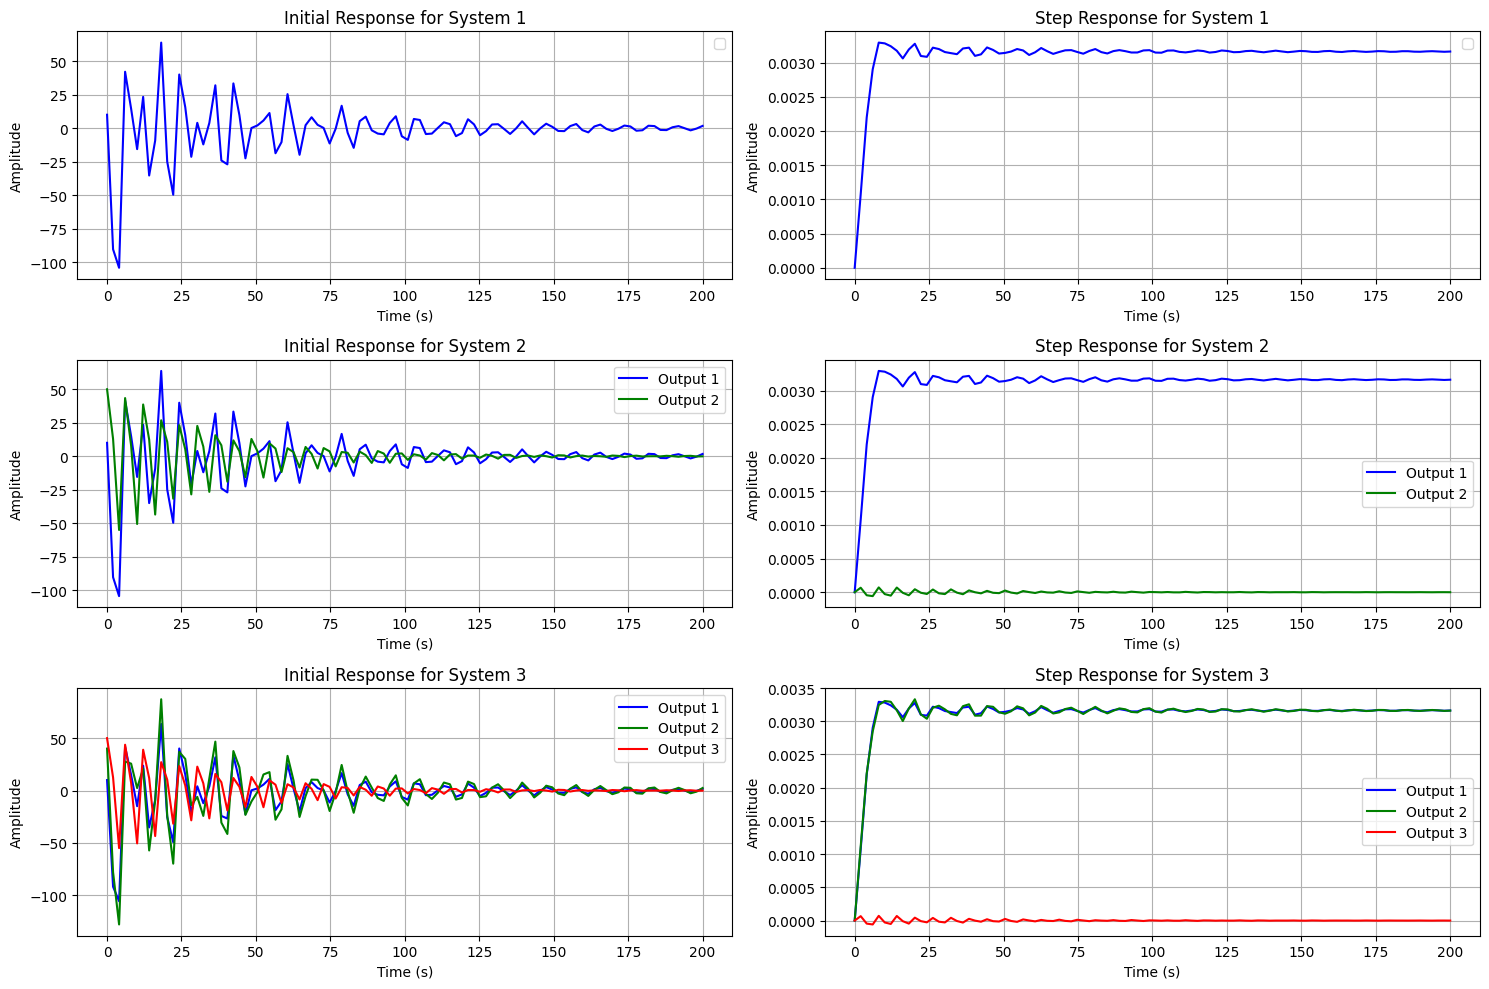

In [ ]:
# Main function to generate the plots
def generate_plots(A, B, C_matrices, poles, K, L, initial_cond):
    """
    Generate initial and step response plots for each system configuration.

    Parameters:
    - A, B: System matrices
    - C_matrices: List of C matrices for observer configurations
    - poles: Desired poles for the controller
    - K: State feedback gains
    - L: Observer gains
    - initial_cond: Initial condition for the initial response
    """
    plt.figure(figsize=(15, 10))  # Create a figure for the plots

    for i, C in enumerate(C_matrices):
        # Create system for the current observer configuration
        sys = create_system(A, B, C, poles, K, L_matrices[i])

        # Plot initial response
        plot_initial_response(sys, i)

        # Plot step response
        plot_step_response(sys, i)

    # Finalize the layout and display the plots
    plt.tight_layout()
    plt.show()

# Example of how to use the functions
generate_plots(A, B, C_matrices, poles, K, L_matrices, initial_conditions)

# Part G-a: LQG Controller for Linear System

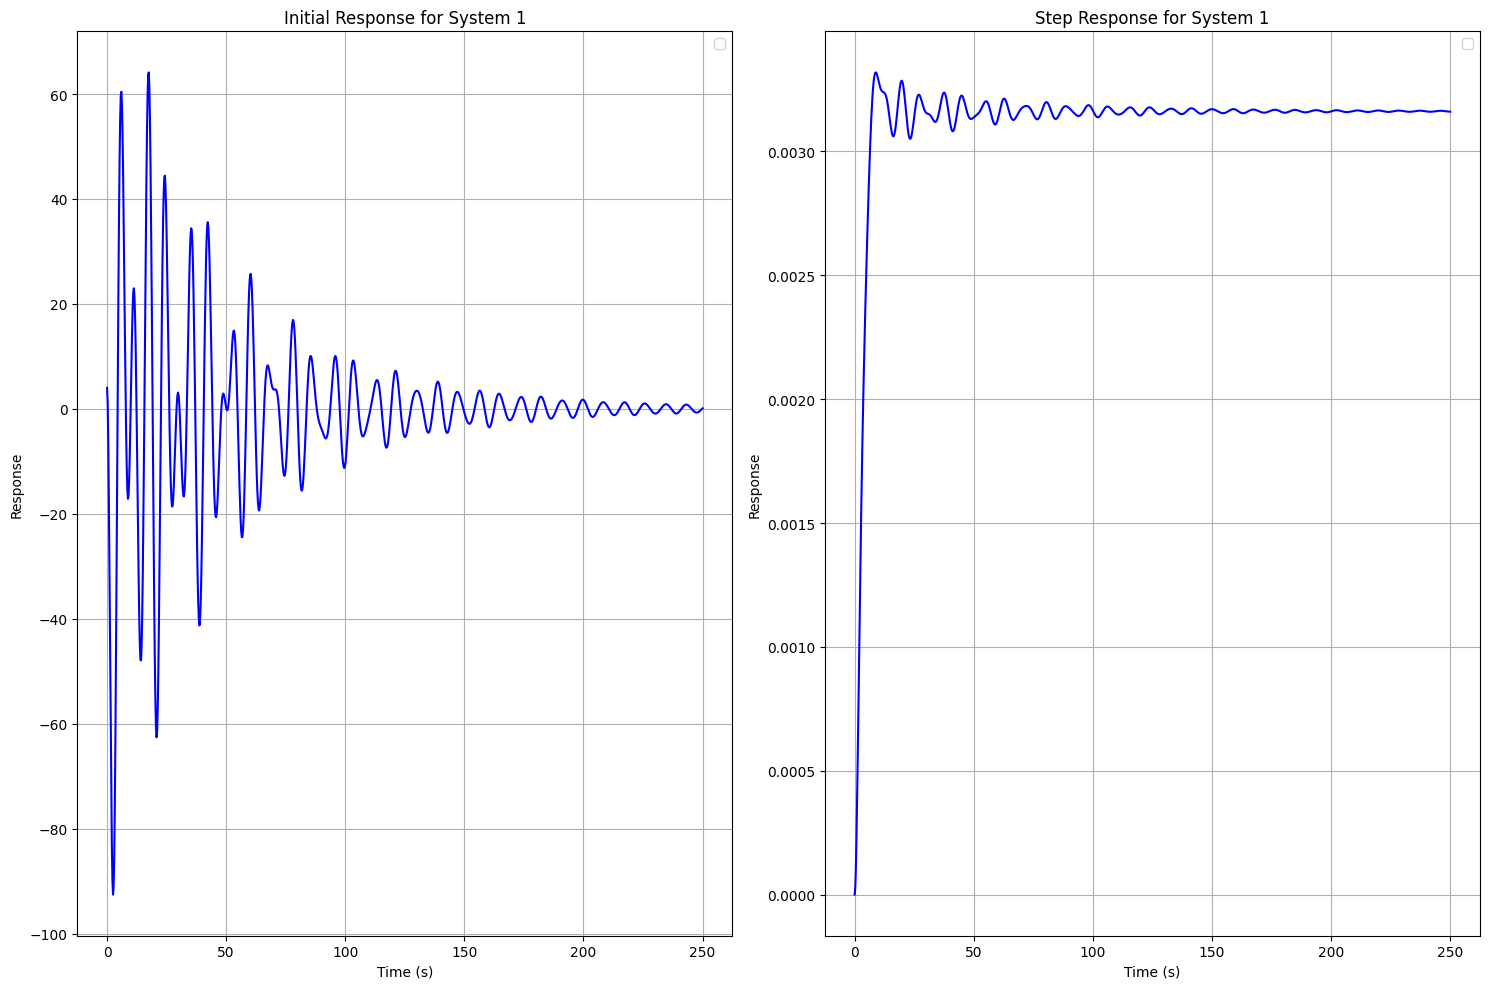

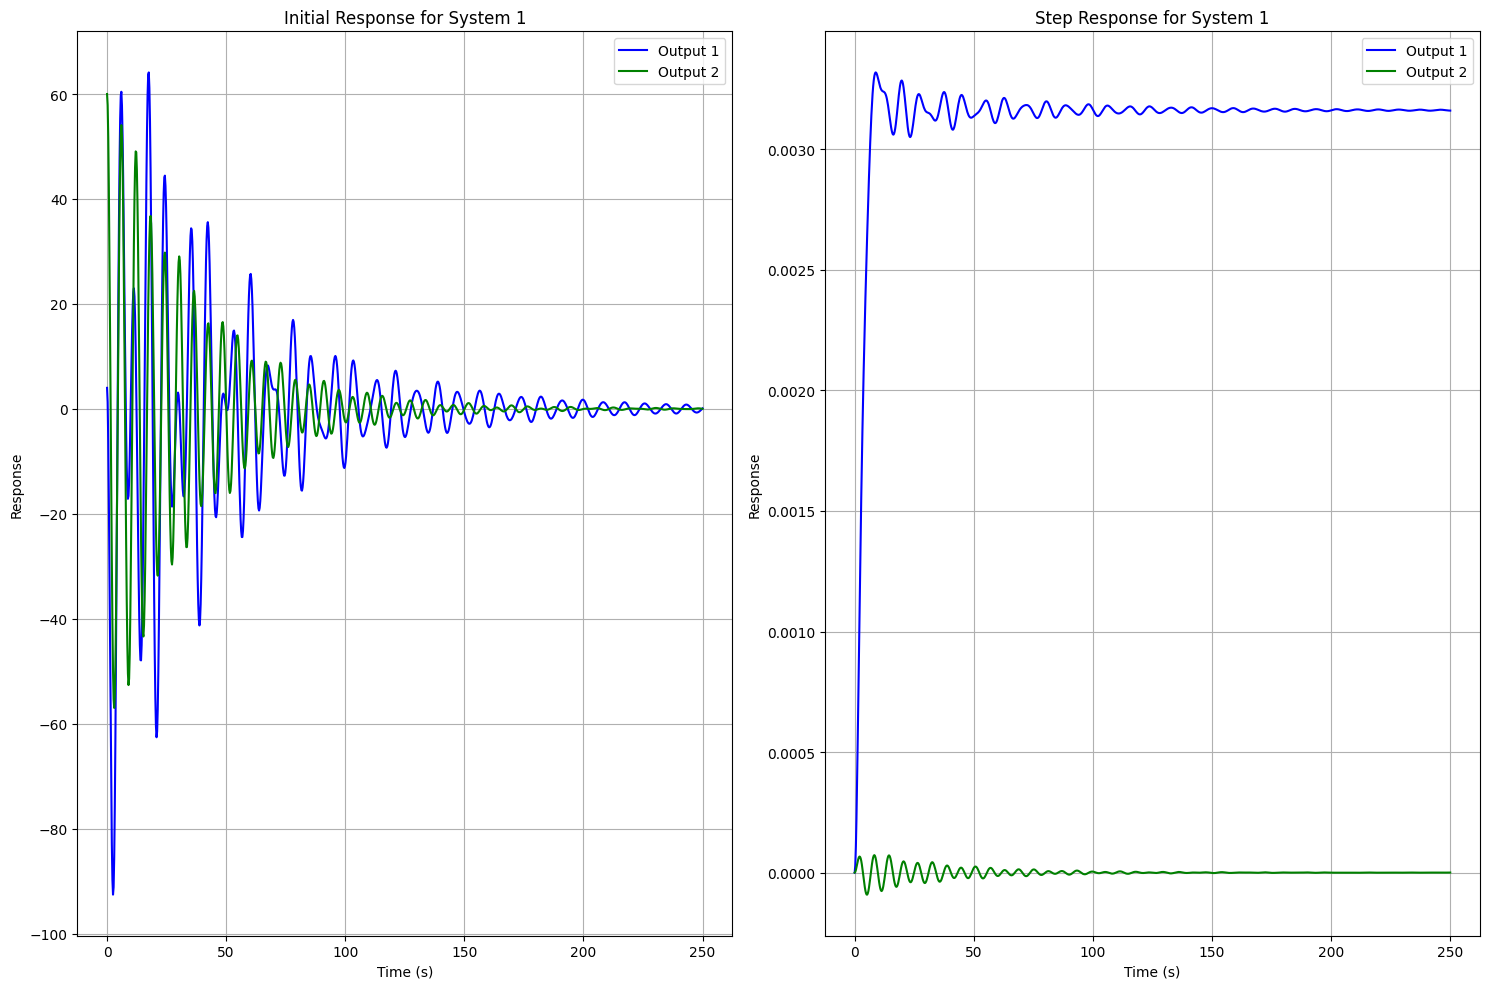

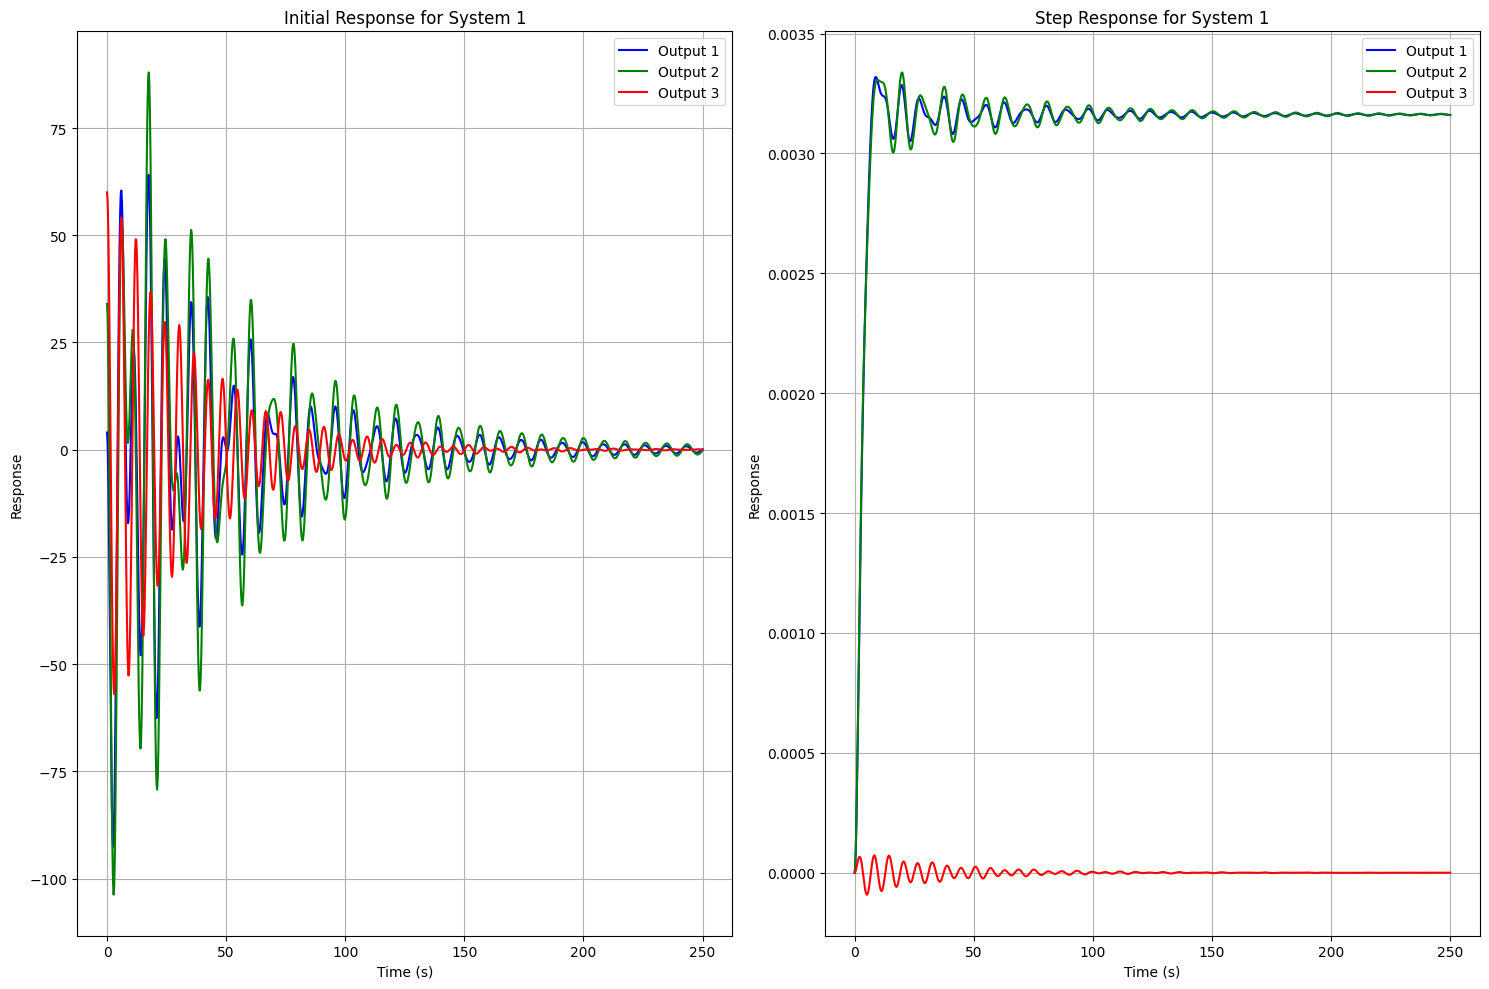

In [ ]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

def define_system_parameters():
    """
    Define system parameters and return the system matrices A, B, and D.
    """
    M = 1000        # Mass of the cart (kg)
    mass_1 = 100    # Mass of Pendulum 1 (kg)
    mass_2 = 100    # Mass of Pendulum 2 (kg)
    length_1 = 20   # Length of pendulum 1 (m)
    length_2 = 10   # Length of pendulum 2 (m)
    g = 9.81        # Gravitational acceleration (m/s^2)

    A = np.array([[0, 1, 0, 0, 0, 0],
                  [0, 0, -(mass_1*g)/M, 0, -(mass_2*g)/M, 0],
                  [0, 0, 0, 1, 0, 0],
                  [0, 0, -((M+mass_1)*g)/(M*length_1), 0, -(mass_2*g)/(M*length_1), 0],
                  [0, 0, 0, 0, 0, 1],
                  [0, 0, -(mass_1*g)/(M*length_2), 0, -(g*(M+mass_2))/(M*length_2), 0]])

    B = np.array([[0], [1/M], [0], [1/(M*length_1)], [0], [1/(M*length_2)]])
    D = np.zeros((1, 1))  # No direct feedthrough

    return A, B, D

def define_output_matrices():
    """
    Define the different output matrices (C_matrices) for different observables.
    """
    C_matrices = [
        np.array([[1, 0, 0, 0, 0, 0]]),  # Observing x component
        np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]]),  # Observing x and theta2
        np.array([[1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])  # Observing x, theta1, and theta2
    ]

    return C_matrices

def design_lqr_controller(A, B, Q, R):
    """
    Design the LQR controller.
    """
    K, S, eigen_values = ctrl.lqr(A, B, Q, R)
    return K

def design_kalman_filter(A, C, v_d, v_n):
    """
    Design the Kalman filter for a given system using LQR method.
    """
    R_kalman = v_n * np.eye(C.shape[0])  # Measurement noise covariance
    K_pop = ctrl.lqr(A.T, C.T, v_d, R_kalman)[0].T
    return K_pop

def construct_lqg_system(A, B, C, K, K_pop):
    """
    Construct the state-space model for the LQG system (state feedback + Kalman observer).
    """
    sys = ctrl.ss(
        np.block([
            [A - np.dot(B, K), np.dot(B, K)],  # State feedback part
            [np.zeros_like(A), A - np.dot(K_pop, C)]  # Observer part (Kalman filter)
        ]),
        np.block([[B], [np.zeros_like(B)]]),
        np.block([C, np.zeros_like(C)]),
        np.zeros((C.shape[0], B.shape[1]))
    )
    return sys

def plot_responses(sys, C_matrices, initial_conditions, colors):
    """
    Plot the initial and step responses for each system.
    """
    plt.figure(figsize=(15, 10))

    for i, C in enumerate(C_matrices):
        # Initial response
        plt.subplot(len(C_matrices), 2, 2*i + 1)
        T, yout = ctrl.initial_response(sys, T=np.linspace(0, 250, 1000), X0=initial_conditions)
        yout = np.squeeze(yout)  # Ensure yout is a 1D array if it has only one output
        if yout.ndim == 1:
            plt.plot(T, yout, color=colors[i])
        else:
            for j in range(yout.shape[0]):
                plt.plot(T, yout[j, :], label=f'Output {j+1}', color=colors[j])
        plt.title(f'Initial Response for System {i+1}')
        plt.xlabel('Time (s)')
        plt.ylabel('Response')
        plt.legend()
        plt.grid(True)

        # Step response
        plt.subplot(len(C_matrices), 2, 2*i + 2)
        T, yout = ctrl.step_response(sys, T=np.linspace(0, 250, 1000))
        yout = np.squeeze(yout)  # Ensure yout is a 1D array if it has only one output
        if yout.ndim == 1:
            plt.plot(T, yout, color=colors[i])
        else:
            for j in range(yout.shape[0]):
                plt.plot(T, yout[j, :], label=f'Output {j+1}', color=colors[j])
        plt.title(f'Step Response for System {i+1}')
        plt.xlabel('Time (s)')
        plt.ylabel('Response')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

def run_lqg_design(A, B, C_matrices, initial_conditions, Q, R, v_d, v_n, colors):
    """
    Main function to perform LQG design and plot responses for different C_matrices.
    """
    # Design LQR controller
    K = design_lqr_controller(A, B, Q, R)

    # Loop through each C_matrix and plot responses
    for i, C in enumerate(C_matrices):
        # Design the Kalman filter for each system
        K_pop = design_kalman_filter(A, C, v_d, v_n)

        # Construct the state-space model for LQG
        sys = construct_lqg_system(A, B, C, K, K_pop)

        # Plot the initial and step responses for this system
        plot_responses(sys, [C], initial_conditions, colors)

# 2. Define initial conditions and noise parameters
initial_conditions = np.array([4, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])
colors = ['b', 'g', 'r']  # Colors for plotting

# 3. Define system parameters
A, B, D = define_system_parameters()

# 4. Define output matrices
C_matrices = define_output_matrices()

# 5. Define LQR and Kalman filter parameters
Q = np.diag([100, 100, 100, 100, 100, 100])  # State weighting
R = np.array([[0.001]])  # Control effort weighting
v_d = 0.3 * np.eye(6)    # Process noise covariance
v_n = 1                  # Measurement noise covariance

# 6. Run LQG Design and Plot Responses
run_lqg_design(A, B, C_matrices, initial_conditions, Q, R, v_d, v_n, colors)


# Part F-b: LQG Controller for Non-Linear System

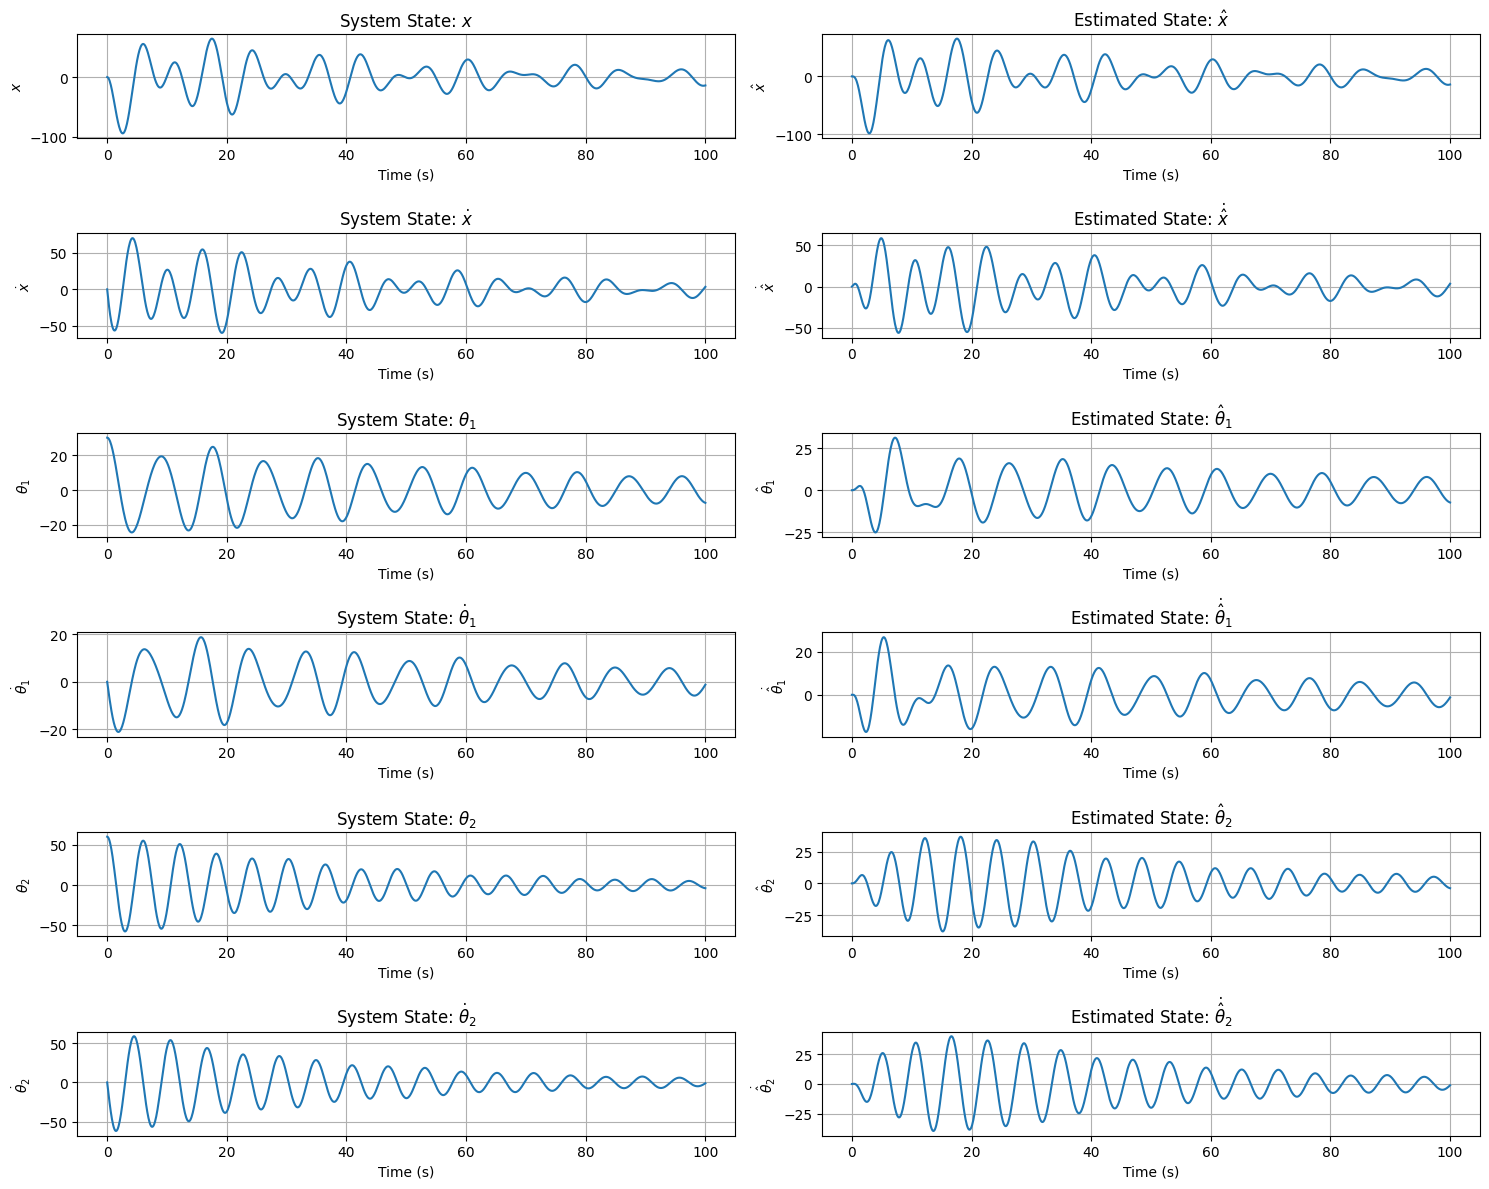

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import control as ctrl

# Part 1: Define System Parameters and State-Space Matrices

def define_system_parameters():
    # Define system parameters
    M = 1000
    mass_1 = 100
    mass_2 = 100
    length_1 = 20
    length_2 = 10
    g = 9.81
    return M, mass_1, mass_2, length_1, length_2, g

def construct_state_space(M, mass_1, mass_2, length_1, length_2, g):
    # Construct the state-space matrices A and B
    A = np.array([[0, 1, 0, 0, 0, 0],
                  [0, 0, -(mass_1 * g) / M, 0, -(mass_2 * g) / M, 0],
                  [0, 0, 0, 1, 0, 0],
                  [0, 0, -((M + mass_1) * g) / (M * length_1), 0, -(mass_2 * g) / (M * length_1), 0],
                  [0, 0, 0, 0, 0, 1],
                  [0, 0, -(mass_1 * g) / (M * length_2), 0, -((M + mass_2) * g) / (M * length_2), 0]])

    B = np.array([[0], [1 / M], [0], [1 / (M * length_1)], [0], [1 / (M * length_2)]])
    C_matrix = np.array([[1, 0, 0, 0, 0, 0]])   # C for x
    return A, B, C_matrix

# Part 2: LQR Design

def design_lqr(A, B):
    Q = np.diag([1000, 1000, 100, 10, 1000, 100])
    R = 0.01
    K, _, _ = ctrl.lqr(A, B, Q, R)
    return K

# Part 3: Kalman Filter Design

def design_kalman_filter(A, C_matrix):
    v_d = 0.3 * np.eye(6)
    v_n = 1
    K_pop = ctrl.lqr(A.T, C_matrix.T, v_d, v_n)[0].T
    return K_pop

# Part 4: Define Nonlinear LQG Control Function

def lqg_dynamics(y, t, A, B, K, C_matrix, K_pop):
    # Control input
    controlled_force = -K @ y[:6]
    # Estimator dynamics
    dx_hat = A @ y[6:12] + B @ controlled_force + K_pop @ (C_matrix @ y[:6] - C_matrix @ y[6:12])
    # System dynamics (controlled system)
    dx = A @ y[:6] + B @ controlled_force
    return np.concatenate((dx, dx_hat))

# Part 5: Run Simulation

def run_simulation(lqg_dynamics, A, B, K, C_matrix, K_pop, initial_conditions, time_span):
    # Solving the system using the odeint solver
    x = odeint(lqg_dynamics, initial_conditions, time_span, args=(A, B, K, C_matrix, K_pop))
    return x

# Part 6: Plot Results

def plot_results(time_span, x):
    plt.figure(figsize=(15, 12))

    # First six plots: System States
    for i, label in enumerate(['$x$', '$\dot{x}$', '$\\theta_1$', '$\dot{\\theta}_1$', '$\\theta_2$', '$\dot{\\theta}_2$']):
        plt.subplot(6, 2, 2*i + 1)  # Plot on odd indices (1, 3, 5, 7, 9, 11)
        plt.plot(time_span, x[:, i])
        plt.title(f'System State: {label}')
        plt.xlabel('Time (s)')
        plt.ylabel(label)
        plt.grid(True)

    # Next six plots: Estimated States
    for i, label in enumerate(['$\hat{x}$', '$\dot{\hat{x}}$', '$\hat{\\theta}_1$', '$\dot{\hat{\\theta}}_1$', '$\hat{\\theta}_2$', '$\dot{\hat{\\theta}}_2$']):
        plt.subplot(6, 2, 2*i + 2)  # Plot on even indices (2, 4, 6, 8, 10, 12)
        plt.plot(time_span, x[:, i + 6])
        plt.title(f'Estimated State: {label}')
        plt.xlabel('Time (s)')
        plt.ylabel(label)
        plt.grid(True)

    plt.tight_layout()
    plt.show()



# Step 1: Define system parameters
M, mass_1, mass_2, length_1, length_2, g = define_system_parameters()

# Step 2: Construct state-space matrices
A, B, C_matrix = construct_state_space(M, mass_1, mass_2, length_1, length_2, g)

# Step 3: Design LQR controller
K = design_lqr(A, B)

# Step 4: Design Kalman Filter
K_pop = design_kalman_filter(A, C_matrix)

# Step 5: Set initial conditions and time span for the simulation
initial_conditions = np.array([0, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])
time_span = np.linspace(0, 100, 1001)

# Step 6: Run the simulation
x = run_simulation(lqg_dynamics, A, B, K, C_matrix, K_pop, initial_conditions, time_span)

# Step 7: Plot results
plot_results(time_span, x)